### Obtendo Clusters

In [21]:
import pandas as pd

df = pd.read_csv("cc GENERAL.csv")

df['CUST_ID'] = df['CUST_ID'].map(lambda x: x.lstrip('C').rstrip(''))
df.drop(columns=["TENURE"], inplace=True)

#df.drop(columns=["CUST_ID", "TENURE"], inplace=True)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [22]:
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()

In [23]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [25]:
#Silhouette

from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric='euclidean')
print(silhouette) 

0.30728485644805303


In [26]:
#Davies-Bouldin

dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.3671788959489266


In [27]:
#Calinski-Harabasz

calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3237.4279311475766


### Validação

In [28]:
#Validação

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [29]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.37655321193714286 1.5498311982046145 4052.2019622586777


In [30]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3071051596955279 1.3674096105895661 3237.4105307508953


In [31]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3030070749531011 1.2047382620198968 2724.079806990906


In [32]:
# Análise vs dados aleatórios
import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski) 
print(s2,dbs2, calinski2)

0.03932700728949264 3.547671608029733 302.72581309318866
0.3071051596955279 1.3674096105895661 3237.4105307508953


In [33]:
#Estabilidade dividindo dataset em 3
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3410299692742802 1.230162454186291 1008.2025380920063
0.37118733448420776 1.2859584132245667 1000.3942429358639
0.3629044890267203 1.2123052356285609 887.0740680194637


### Vizualizando Gráficos

<function matplotlib.pyplot.show(close=None, block=None)>

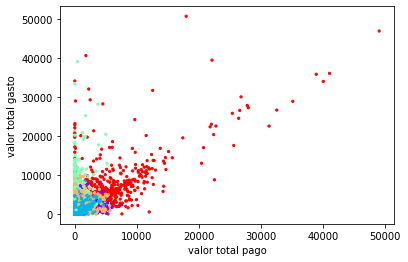

In [34]:
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

In [35]:
df["cluster"] = labels
df.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         987.0  1427.054241  1781.829048   0.000000   115.530468   
1        4297.0   664.253629   671.179343   0.000000    57.657781   
2         917.0  5726.875719  2661.104809  78.114579  4028.036480   
3        2308.0  1452.766313  1352.351592   0.000000   202.816262   
4         441.0  2573.060415  2669.942592   0.000000   681.615445   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         477.165840  2371.376514   9962.070262             987.0  0.882772   
1         445.179998  1121.730896   3572.844689            4297.0  0.841686   
2        5459.785308  7114.235621  18495.558550             917.0  0.974862   
3        1166.408851  2460.150644   6256.556896            2308.0  0.891060   
4        1758.703148  3391.702180  19043.138560             441.0  0.936598   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       627.314014   5583.630482            987.0  0.228838   
1        ...       444.684235  20316.096310           4297.0  0.147816   
2        ...      2715.036678  76406.207520            917.0  0.020780   
3        ...       770.937553  16638.733850           2308.0  0.152116   
4        ...      1333.818771  18621.013310            441.0  0.327844   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.347781  0.0  0.0  0.000000  0.400000  1.0  
1        0.284242  0.0  0.0  0.000000  0.142857  1.0  
2        0.061115  0.0  0.0  0.000000  0.000000  0.6  
3        0.290386  0.0  0.0  0.000000  0.125000  1.0  
4        0.387395  0.0  0.0  0.083333  0.727273  1.0  

[5 rows x 128 columns]

In [ ]:
centroids = kmeans.cluster_centers_
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

### Interpretando Clusters

In [37]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1427.054241  1297.685339    359.779764   9942.631482  1623.133417   
1         664.253629   437.052006    386.393353   1839.797404   744.289077   
2        5726.875719   695.033282   4651.112704   8607.693070  3768.175227   
3        1452.766313   895.304320    870.699594   4733.724813  1506.892681   
4        2573.060415  7066.094036   1067.611293   8358.616780  8567.051338   

         n_clients  
cluster             
0              987  
1             4297  
2              917  
3             2308  
4              441  


C:\Users\lucas\AppData\Local\Temp\ipykernel_15900\2171056641.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [38]:
df.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,987.0,0.228838,0.347781,0.0,0.0,0.000000,0.400000,1.0
1,4297.0,0.147816,0.284242,0.0,0.0,0.000000,0.142857,1.0
2,917.0,0.020780,0.061115,0.0,0.0,0.000000,0.000000,0.6
3,2308.0,0.152116,0.290386,0.0,0.0,0.000000,0.125000,1.0
4,441.0,0.327844,0.387395,0.0,0.0,0.083333,0.727273,1.0


### IDs

In [46]:
df.cluster.value_counts()

1    4297
3    2308
0     987
2     917
4     441
Name: cluster, dtype: int64

In [47]:
cust_clusters = df.query('cluster == 4')
cust_clusters.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
6,10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,4
21,10022,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,4
23,10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,4
39,10040,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6,6,7500.0,20071.075440,719.948985,0.333333,4
57,10059,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,4
